Author: Autumn Salsberry

Contact: linkedin.com/in/salsbeas

BrainStation Capstone: Predicting Adoptability of Shelter Dogs

August 8, 2022

This notebook is for diving into deep learning models to see if I can further improve the predictive power of my models that had ~19% increase from base (with the random forest and logistic models) in the previous notebook. I will explore neural networks and boosting here. 

# Table of Contents

* [Fitting a Neural Network](#nn)
* [Boosting](#boost) 
* [Conclusion](#conclusion)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Goal

* Explore if deep learning models can improve on the accuracy, precision and recall of the SkLearn models

I will start by reading in the data and preparing it to fit models with. 

In [2]:
#load in the dataset
adopt_df = pd.read_csv('Tabular Data/new_adopt_category.csv')
adopt_df.head()

,Animal ID,stray,normal_intake,age_in_months_intake,adopted,age_in_months_outcome,sex,fixed_intake,fixed_changed,retriever,...,blue,red,chocolate,sable,outcome_day,outcome_month,outcome_year,intake_day,intake_month,intake_year
0,A683644,0,0,0.93,1,4.0,0,0,1,0,...,0,0,0,0,6,11,-34,13,7,-34
1,A742953,1,1,24.00,0,24.0,1,0,0,0,...,0,0,0,1,4,2,-31,31,1,-31
2,A692161,0,1,5.00,1,5.0,1,0,1,0,...,0,0,0,0,21,11,-34,15,11,-34
3,A720597,1,0,24.00,0,24.0,1,0,0,0,...,1,0,0,0,19,2,-32,12,2,-32
4,A715806,1,1,24.00,1,24.0,0,0,1,1,...,0,0,0,0,23,12,-33,10,11,-33


In [3]:
#set the taret and independent variables
X = adopt_df.drop(['Animal ID', 'adopted'], axis= 1)
y = adopt_df['adopted']

In [4]:
#confirm their shapes are similar
print(X.shape)
y.shape

(21462, 56)


(21462,)

In [5]:
from sklearn.model_selection import train_test_split as tts

#remain test split
X_remain, X_test, y_remain, y_test = tts(X, y, test_size=0.3, stratify=y, random_state=3)

In [6]:
#check the shapes
print(X_remain.shape)
print(y_remain.shape)
print(X_test.shape)
y_test.shape

(15023, 56)
(15023,)
(6439, 56)


(6439,)

In [7]:
#train val split
X_train, X_val, y_train, y_val = tts(X_remain, y_remain, test_size=0.3, stratify=y_remain, random_state=2)

In [8]:
#check that the shapes are consistent 
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
y_val.shape

(10516, 56)
(10516,)
(4507, 56)


(4507,)

Now that I have split the data and know it is ready for modeling, I will run a neural network using MLPClassifier. 

# Fitting a Neural Network
<a class="anchor" id="nn"></a>

ANNs have some key advantages that make them most suitable for certain problems and situations:

1. ANNs have the ability to learn and model non-linear and complex relationships, which is really important because in real-life, many of the relationships between inputs and outputs are non-linear as well as complex.

2. ANNs can generalize — After learning from the initial inputs and their relationships, it can infer unseen relationships on unseen data as well, thus making the model generalize and predict on unseen data.

3. Unlike many other prediction techniques, ANN does not impose any restrictions on the input variables (like how they should be distributed). Additionally, many studies have shown that ANNs can better model heteroskedasticity i.e. data with high volatility and non-constant variance, given its ability to learn hidden relationships in the data without imposing any fixed relationships in the data. This is something very useful in financial time series forecasting (e.g. stock prices) where data volatility is very high.

<a href="https://towardsdatascience.com/introduction-to-neural-networks-advantages-and-applications-96851bd1a207"> Source</a>

I'll start with a relatively simple NN to get a sense of if it is worth hyper tunning. 

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(5, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

In [10]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [11]:
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

329/329 [==============================] - 0s 937us/step - loss: 0.7622 - binary_accuracy: 0.5733
Epoch 2/100
329/329 [==============================] - 0s 956us/step - loss: 0.6469 - binary_accuracy: 0.6271
Epoch 3/100
329/329 [==============================] - 0s 888us/step - loss: 0.6356 - binary_accuracy: 0.6380
Epoch 4/100
329/329 [==============================] - 0s 870us/step - loss: 0.6236 - binary_accuracy: 0.6495
Epoch 5/100
329/329 [==============================] - 0s 929us/step

329/329 [==============================] - 0s 851us/step - loss: 0.4569 - binary_accuracy: 0.8010
Epoch 69/100
329/329 [==============================] - 0s 839us/step - loss: 0.4577 - binary_accuracy: 0.7994
Epoch 70/100
329/329 [==============================] - 0s 830us/step - loss: 0.4571 - binary_accuracy: 0.8016
Epoch 71/100
329/329 [==============================] - 0s 917us/step - loss: 0.4588 - binary_accuracy: 0.8010
Epoch 72/100
329/329 [==============================] - 0s 883us/step - loss: 0.4580 - binary_accuracy: 0.8007
Epoch 73/100
329/329 [==============================] - 0s 882us/step - loss: 0.4564 - binary_accuracy: 0.8002
Epoch 74/100
329/329 [==============================] - 0s 892us/step - loss: 0.4558 - binary_accuracy: 0.8028
Epoch 75/100
329/329 [==============================] - 0s 897us/step - loss: 0.4564 - binary_accuracy: 0.8009
Epoch 76/100
329/329 [==============================] - 0s 891us/step - loss: 0.4554 - binary_accuracy: 0.8030
Epoch 77/100
3

In [12]:
# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_val,y_val, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Val Accuracy: {result[1]:.4f}") 

# Generate predictions
predictions = model.predict(X_val)

Train Accuracy: 0.8003
Val Accuracy: 0.7905


This first pass is relatively close to the accuracy of the SkLearn models, thus it is definitely worth looking deeper into this kind of model. I will start with a few more layers with a greater number of nodes and a large number of epochs. 

In [13]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(),  
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [14]:
# Train the network, turn verbosity off since we are running for many epochs
history = model.fit(X_train, y_train, epochs=1000, verbose=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [15]:
# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_val,y_val, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Val Accuracy: {result[1]:.4f}")

# Generate predictions
predictions = model.predict(X_val)

Train Accuracy: 0.9752
Val Accuracy: 0.7153


It looks like this number of layers, nodes and epochs is over fitting quite a lot. Let me take a look at the same number of layers and nodes, but with fewer epochs. 

In [16]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dense(40, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=500, 
                    verbose=1,
                    validation_data=(X_val, y_val)) 

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

329/329 [==============================] - 1s 2ms/step - loss: 0.6299 - binary_accuracy: 0.6580 - val_loss: 0.6053 - val_binary_accuracy: 0.6863
Epoch 2/500
329/329 [==============================] - 0s 1ms/step - loss: 0.5766 - binary_accuracy: 0.7125 - val_loss: 0.5540 - val_binary_accuracy: 0.7309
Epoch 3/500
329/329 [==============================] - 0s 1ms/step - loss: 0.5197 - binary_accuracy: 0.7568 - val_loss: 0.4995 - val_binary_accuracy: 0.7721
Epoch 4/500
329/329 [================

329/329 [==============================] - 1s 2ms/step - loss: 0.4296 - binary_accuracy: 0.8091 - val_loss: 0.4798 - val_binary_accuracy: 0.7901
Epoch 49/500
329/329 [==============================] - 1s 2ms/step - loss: 0.4239 - binary_accuracy: 0.8110 - val_loss: 0.5142 - val_binary_accuracy: 0.7948
Epoch 50/500
329/329 [==============================] - 0s 1ms/step - loss: 0.4243 - binary_accuracy: 0.8112 - val_loss: 0.4830 - val_binary_accuracy: 0.7921
Epoch 51/500
329/329 [==============================] - 0s 1ms/step - loss: 0.4209 - binary_accuracy: 0.8116 - val_loss: 0.4897 - val_binary_accuracy: 0.7897
Epoch 52/500
329/329 [==============================] - 0s 1ms/step - loss: 0.4215 - binary_accuracy: 0.8122 - val_loss: 0.4989 - val_binary_accuracy: 0.7890
Epoch 53/500
329/329 [==============================] - 0s 1ms/step - loss: 0.4176 - binary_accuracy: 0.8136 - val_loss: 0.4842 - val_binary_accuracy: 0.7941
Epoch 54/500
329/329 [==============================] - 0s 1ms/st

Epoch 100/500
329/329 [==============================] - 0s 1ms/step - loss: 0.3662 - binary_accuracy: 0.8336 - val_loss: 0.5555 - val_binary_accuracy: 0.7690
Epoch 101/500
329/329 [==============================] - 0s 1ms/step - loss: 0.3554 - binary_accuracy: 0.8364 - val_loss: 0.5679 - val_binary_accuracy: 0.7788
Epoch 102/500
329/329 [==============================] - 0s 1ms/step - loss: 0.3613 - binary_accuracy: 0.8336 - val_loss: 0.5494 - val_binary_accuracy: 0.7721
Epoch 103/500
329/329 [==============================] - 0s 1ms/step - loss: 0.3587 - binary_accuracy: 0.8360 - val_loss: 0.5575 - val_binary_accuracy: 0.7748
Epoch 104/500
329/329 [==============================] - 0s 1ms/step - loss: 0.3588 - binary_accuracy: 0.8346 - val_loss: 0.5625 - val_binary_accuracy: 0.7788
Epoch 105/500
329/329 [==============================] - 0s 1ms/step - loss: 0.3550 - binary_accuracy: 0.8387 - val_loss: 0.5561 - val_binary_accuracy: 0.7726
Epoch 106/500
329/329 [=======================

329/329 [==============================] - 1s 2ms/step - loss: 0.2972 - binary_accuracy: 0.8652 - val_loss: 0.7528 - val_binary_accuracy: 0.7362
Epoch 152/500
329/329 [==============================] - 1s 2ms/step - loss: 0.3103 - binary_accuracy: 0.8594 - val_loss: 0.6680 - val_binary_accuracy: 0.7604
Epoch 153/500
329/329 [==============================] - 0s 1ms/step - loss: 0.3065 - binary_accuracy: 0.8635 - val_loss: 0.6951 - val_binary_accuracy: 0.7553
Epoch 154/500
329/329 [==============================] - ETA: 0s - loss: 0.3042 - binary_accuracy: 0.862 - 0s 1ms/step - loss: 0.3016 - binary_accuracy: 0.8648 - val_loss: 0.7213 - val_binary_accuracy: 0.7550
Epoch 155/500
329/329 [==============================] - 0s 1ms/step - loss: 0.2925 - binary_accuracy: 0.8650 - val_loss: 0.8141 - val_binary_accuracy: 0.7484
Epoch 156/500
329/329 [==============================] - 0s 1ms/step - loss: 0.2998 - binary_accuracy: 0.8648 - val_loss: 0.7404 - val_binary_accuracy: 0.7595
Epoch 157/

Epoch 202/500
329/329 [==============================] - ETA: 0s - loss: 0.2545 - binary_accuracy: 0.886 - 0s 1ms/step - loss: 0.2544 - binary_accuracy: 0.8864 - val_loss: 0.7974 - val_binary_accuracy: 0.7424
Epoch 203/500
329/329 [==============================] - 0s 1ms/step - loss: 0.2461 - binary_accuracy: 0.8910 - val_loss: 0.9148 - val_binary_accuracy: 0.7422
Epoch 204/500
329/329 [==============================] - 0s 1ms/step - loss: 0.2536 - binary_accuracy: 0.8878 - val_loss: 0.8720 - val_binary_accuracy: 0.7533
Epoch 205/500
329/329 [==============================] - 0s 1ms/step - loss: 0.2540 - binary_accuracy: 0.8911 - val_loss: 0.7538 - val_binary_accuracy: 0.7475
Epoch 206/500
329/329 [==============================] - 0s 1ms/step - loss: 0.2473 - binary_accuracy: 0.8912 - val_loss: 0.8621 - val_binary_accuracy: 0.7357
Epoch 207/500
329/329 [==============================] - 0s 1ms/step - loss: 0.2466 - binary_accuracy: 0.8911 - val_loss: 0.9084 - val_binary_accuracy: 0.7

329/329 [==============================] - 1s 2ms/step - loss: 0.2063 - binary_accuracy: 0.9141 - val_loss: 0.9796 - val_binary_accuracy: 0.7289
Epoch 254/500
329/329 [==============================] - 1s 2ms/step - loss: 0.2260 - binary_accuracy: 0.9019 - val_loss: 0.9393 - val_binary_accuracy: 0.7340
Epoch 255/500
329/329 [==============================] - 1s 2ms/step - loss: 0.2167 - binary_accuracy: 0.9047 - val_loss: 1.0332 - val_binary_accuracy: 0.7451
Epoch 256/500
329/329 [==============================] - 0s 1ms/step - loss: 0.2059 - binary_accuracy: 0.9114 - val_loss: 0.9733 - val_binary_accuracy: 0.7537
Epoch 257/500
329/329 [==============================] - 0s 1ms/step - loss: 0.2156 - binary_accuracy: 0.9087 - val_loss: 0.9308 - val_binary_accuracy: 0.7535
Epoch 258/500
329/329 [==============================] - 0s 1ms/step - loss: 0.2067 - binary_accuracy: 0.9125 - val_loss: 1.0055 - val_binary_accuracy: 0.7404
Epoch 259/500
329/329 [==============================] - 0s 

329/329 [==============================] - 0s 1ms/step - loss: 0.1856 - binary_accuracy: 0.9207 - val_loss: 1.1511 - val_binary_accuracy: 0.7391
Epoch 305/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1949 - binary_accuracy: 0.9196 - val_loss: 0.9757 - val_binary_accuracy: 0.7464
Epoch 306/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1797 - binary_accuracy: 0.9233 - val_loss: 1.1582 - val_binary_accuracy: 0.7375
Epoch 307/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1790 - binary_accuracy: 0.9232 - val_loss: 1.1379 - val_binary_accuracy: 0.7422
Epoch 308/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1801 - binary_accuracy: 0.9262 - val_loss: 1.1086 - val_binary_accuracy: 0.7395
Epoch 309/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1854 - binary_accuracy: 0.9212 - val_loss: 1.0323 - val_binary_accuracy: 0.7351
Epoch 310/500
329/329 [==============================] - 0s 

329/329 [==============================] - 1s 2ms/step - loss: 0.1622 - binary_accuracy: 0.9322 - val_loss: 1.1769 - val_binary_accuracy: 0.7435
Epoch 356/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1826 - binary_accuracy: 0.9230 - val_loss: 1.1608 - val_binary_accuracy: 0.7393
Epoch 357/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1671 - binary_accuracy: 0.9296 - val_loss: 1.2291 - val_binary_accuracy: 0.7375
Epoch 358/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1517 - binary_accuracy: 0.9374 - val_loss: 1.1729 - val_binary_accuracy: 0.7349
Epoch 359/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1717 - binary_accuracy: 0.9318 - val_loss: 1.1528 - val_binary_accuracy: 0.7389
Epoch 360/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1588 - binary_accuracy: 0.9342 - val_loss: 1.1940 - val_binary_accuracy: 0.7366
Epoch 361/500
329/329 [==============================] - 0s 

329/329 [==============================] - 0s 1ms/step - loss: 0.1358 - binary_accuracy: 0.9444 - val_loss: 1.3467 - val_binary_accuracy: 0.7380
Epoch 407/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1389 - binary_accuracy: 0.9442 - val_loss: 1.3191 - val_binary_accuracy: 0.7258
Epoch 408/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1586 - binary_accuracy: 0.9350 - val_loss: 1.2251 - val_binary_accuracy: 0.7266
Epoch 409/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1336 - binary_accuracy: 0.9448 - val_loss: 1.1923 - val_binary_accuracy: 0.7351
Epoch 410/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1470 - binary_accuracy: 0.9404 - val_loss: 1.2673 - val_binary_accuracy: 0.7269
Epoch 411/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1284 - binary_accuracy: 0.9487 - val_loss: 1.4271 - val_binary_accuracy: 0.7342
Epoch 412/500
329/329 [==============================] - 0s 

329/329 [==============================] - 0s 1ms/step - loss: 0.1248 - binary_accuracy: 0.9502 - val_loss: 1.4386 - val_binary_accuracy: 0.7342
Epoch 458/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1321 - binary_accuracy: 0.9453 - val_loss: 1.3742 - val_binary_accuracy: 0.7262
Epoch 459/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1131 - binary_accuracy: 0.9541 - val_loss: 1.5065 - val_binary_accuracy: 0.7207
Epoch 460/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1386 - binary_accuracy: 0.9463 - val_loss: 1.4267 - val_binary_accuracy: 0.7369
Epoch 461/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1314 - binary_accuracy: 0.9491 - val_loss: 1.4831 - val_binary_accuracy: 0.7340
Epoch 462/500
329/329 [==============================] - 0s 1ms/step - loss: 0.1348 - binary_accuracy: 0.9465 - val_loss: 1.3111 - val_binary_accuracy: 0.7349
Epoch 463/500
329/329 [==============================] - 0s 

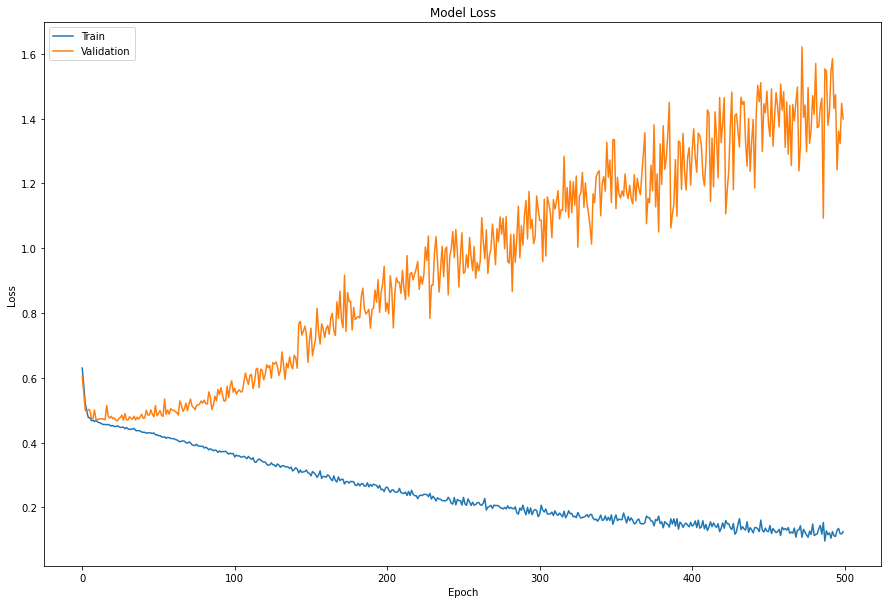

In [17]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

With this visual, it is clear that 500 epochs is still far too many, but the accuracy seems consistently low, so I will reduce this to 100 and also add a few dropout layers to try and account for the over fitting. 

In [18]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2)) # Set 20% of the nodes to 0. 
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(),  
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the network
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val))

# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_val,y_val, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Val Accuracy: {result[1]:.4f}")

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

329/329 [==============================] - 1s 2ms/step - loss: 0.7011 - binary_accuracy: 0.5867 - val_loss: 0.6650 - val_binary_accuracy: 0.6162
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 0.6670 - binary_accuracy: 0.6135 - val_loss: 0.6630 - val_binary_accuracy: 0.6162
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6155 - val_loss: 0.6622 - val_binary_accuracy: 0.6162
Epoch 4/100
329/329 [================

329/329 [==============================] - 1s 2ms/step - loss: 0.4871 - binary_accuracy: 0.7872 - val_loss: 0.5388 - val_binary_accuracy: 0.7750
Epoch 49/100
329/329 [==============================] - 1s 2ms/step - loss: 0.4862 - binary_accuracy: 0.7892 - val_loss: 0.5588 - val_binary_accuracy: 0.7575
Epoch 50/100
329/329 [==============================] - 1s 2ms/step - loss: 0.4833 - binary_accuracy: 0.7904 - val_loss: 0.4824 - val_binary_accuracy: 0.7832
Epoch 51/100
329/329 [==============================] - 1s 2ms/step - loss: 0.4879 - binary_accuracy: 0.7916 - val_loss: 0.5367 - val_binary_accuracy: 0.7655
Epoch 52/100
329/329 [==============================] - 1s 2ms/step - loss: 0.4869 - binary_accuracy: 0.7856 - val_loss: 0.5089 - val_binary_accuracy: 0.7684
Epoch 53/100
329/329 [==============================] - 1s 2ms/step - loss: 0.4829 - binary_accuracy: 0.7924 - val_loss: 0.5134 - val_binary_accuracy: 0.7888
Epoch 54/100
329/329 [==============================] - 1s 2ms/st

Epoch 100/100
329/329 [==============================] - 1s 2ms/step - loss: 0.4747 - binary_accuracy: 0.7935 - val_loss: 0.4930 - val_binary_accuracy: 0.7883
Train Accuracy: 0.7935
Val Accuracy: 0.7883


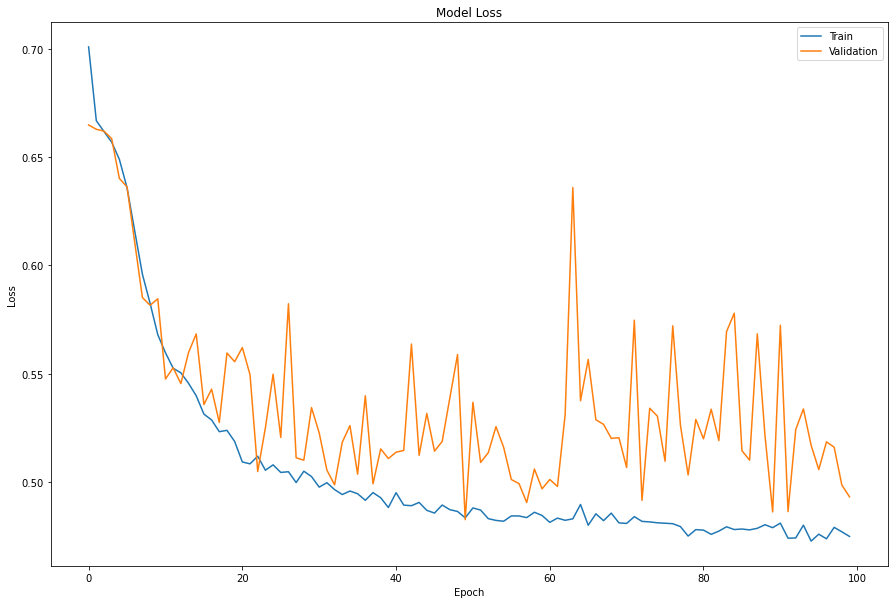

In [19]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

That helped a lot, there is less over fitting now and the accuracy is pretty good too. It looks like the train and validation accuracies split around 30 or 40 epochs, so I will try another run with fewer epochs to see if I can slightly improve the accuracy of the model. I will also add a normalizing layer to see if that helps at all

In [20]:
# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization()) 

model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization()) 

model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization()) 

model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization()) 

model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization()) 

model.add(layers.Dense(40, activation="relu")) 
model.add(layers.Dropout(0.2))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(),  
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the network
history = model.fit(X_train, y_train, epochs=40, verbose=0, validation_data=(X_val, y_val), batch_size = 100)

# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result = model.evaluate(X_val,y_val, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Val Accuracy: {result[1]:.4f}")


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Train Accuracy: 0.7878
Val Accuracy: 0.7952


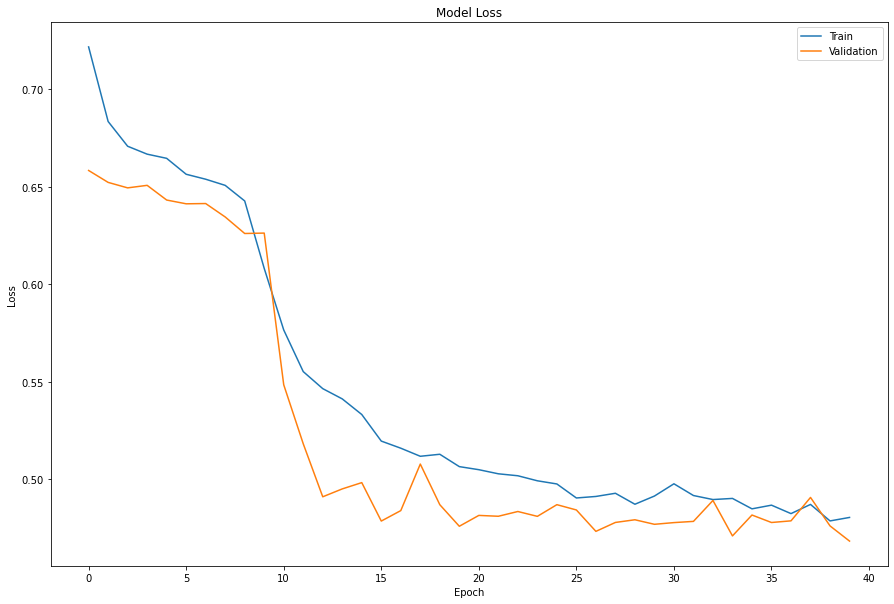

In [21]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

This didn't seem to make a huge difference, so I will leave NN exploration here for now. 

In [22]:
base_rate = y.sum()/y.count()
base_rate

0.6162053862640947

In [23]:
#improvement on base rate
round((result[1]-base_rate)*100, 4)

17.9002

That is a pretty solid increase on base rate, but it still preforms below the logistic and random forest models in the SkLearn notebook. In the future there may be room to better optimize a neural network model to suit this project, but due to time constraint, I will focus my attention elsewhere. 

# Boosting
<a class="anchor" id="boost"></a>

Boosting is a method used in machine learning to reduce errors in predictive data analysis. Data scientists train machine learning software, called machine learning models, on labeled data to make guesses about unlabeled data. A single machine learning model might make prediction errors depending on the accuracy of the training dataset. For example, if a cat-identifying model has been trained only on images of white cats, it may occasionally misidentify a black cat. Boosting tries to overcome this issue by training multiple models sequentially to improve the accuracy of the overall system.

<a href="https://aws.amazon.com/what-is/boosting/#:~:text=Boosting%20is%20a%20method%20used,make%20guesses%20about%20unlabeled%20data."> Source</a>

Three common boosting models are XGBoost, and Ada. Random Forest is not a boosting technique, but the multiple model approach it does have a boosting effect. Furthermore, it is one of the better performing models I have created so far, so I would like to compare Ada and XGBoost to it. I will start with very basic instantiations of these models to see if they are worth hyper tuning. 

In [24]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

XGB_model = XGBClassifier()
AB_model = AdaBoostClassifier()
RF_model = RandomForestClassifier()

XGB_model.fit(X_train, y_train)
AB_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)

print("Test Set Scores:")
print(f"XG Boost score: {XGB_model.score(X_val, y_val)}")
print(f"AdaBoost score: {AB_model.score(X_val, y_val)}")
print(f"Random Forest score: {RF_model.score(X_val, y_val)}")

[19:46:05] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Set Scores:
XG Boost score: 0.7960949633902817
AdaBoost score: 0.7956512092300866
Random Forest score: 0.7996449966718437


All three of these models are performing at a very similar level. For this reason and for the sake of time, I will not dive deeper into these models right now.

# Conclusion
<a class="anchor" id="conclusion"></a>

The more advanced models explored in this notebook have potential to improve upon the predictive power obtained with logistic regression and random forest. Due to the nature of deep learning though, this can be a very time consuming process. This raises the question of practicality. Since this project is for learning purposes, I am sure to revisit these models and hyper tune them at a later date to get a deeper understanding and intuition on how they predict outcomes. If this project were for a client or employer I would discuss the cost/return ratio and determine if this was worth the companies time and resources. 